In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Read the data files
nodes_df = pd.read_csv('../Data/nodes.csv')
edges_df = pd.read_csv('../Data/edges.csv')
edges_df

,id_0,id_1
0,76M2Ekj8bG8W7X2nbx2CpF,7sfl4Xt5KmfyDs2T3SVSMK
1,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD
2,38jpuy3yt3QIxQ8Fn1HTeJ,4csQIMQm6vI2A2SCVDuM2z
3,6PvcxssrQ0QaJVaBWHD07l,6UCQYrcJ6wab6gnQ89OJFh
4,2R1QrQqWuw3IjoP5dXRFjt,4mk1ScvOUkuQzzCZpT6bc0
...,...,...
300381,0PK0Dx3s9et0Uf4XbdFpiW,6SmpksRq3jxeDZ7roKDb6F
300382,5hqRsNHDZH1jHzI9LgxFRZ,7KYseTkErcYMRvcIqacxUq
300383,0wjb0t7aYMuIwyuXnPOilh,2p1fiYHYiXz9qi0JJyxBzN
300384,3ciRvbBIVz9fBoPbtSYq4x,5einkgXXrjhfYCyac1FANB


In [14]:
# Display basic information about both dataframes
print("=== Nodes Dataset ===")
print(nodes_df.info())
print("\nFirst few rows:")
print(nodes_df.head())

print("\n=== Edges Dataset ===")
print(edges_df.info())
print("\nFirst few rows:")
print(edges_df.head())

# Check for missing values
print("\nMissing values in nodes dataset:")
print(nodes_df.isnull().sum())

print("\nMissing values in edges dataset:")
print(edges_df.isnull().sum())

=== Nodes Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156422 entries, 0 to 156421
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   spotify_id  156422 non-null  object 
 1   name        156418 non-null  object 
 2   followers   156418 non-null  float64
 3   popularity  156422 non-null  int64  
 4   genres      156422 non-null  object 
 5   chart_hits  19641 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.2+ MB
None

First few rows:
               spotify_id                name  followers  popularity  \
0  48WvrUGoijadXXCsGocwM4           Byklubben     1738.0          24   
1  4lDiJcOJ2GLCK6p9q5BgfK            Kontra K  1999676.0          72   
2  652XIvIBNGg3C0KIGEJWit               Maxim    34596.0          36   
3  3dXC1YPbnQPsfHPVkm1ipj  Christopher Martin   249233.0          52   
4  74terC9ol9zMo8rfzhSOiG       Jakob Hellman    21193.0          39   

               

In [15]:
# Calculate collaboration counts for each artist
artist_collabs = pd.concat([edges_df['id_0'], edges_df['id_1']]).value_counts().reset_index()
artist_collabs.columns = ['spotify_id', 'collab_count']

# Merge collaboration counts with nodes dataframe
nodes_with_collabs = nodes_df.merge(artist_collabs, on='spotify_id', how='left')
nodes_with_collabs['collab_count'] = nodes_with_collabs['collab_count'].fillna(0)

# Display top 10 artists by collaboration count
print("Top 10 Artists by Number of Collaborations:")
print(nodes_with_collabs.nlargest(10, 'collab_count')[['name', 'collab_count']])

# Display artists with no collaborations
print("\nSample of Artists with No Collaborations:")
print(nodes_with_collabs[nodes_with_collabs['collab_count'] == 0][['name']].sample(10))


Top 10 Artists by Number of Collaborations:
                        name  collab_count
12406  Johann Sebastian Bach        1781.0
18735            Traditional        1371.0
5609                   Mc Gw         858.0
13370                  MC MN         632.0
11577          Jean Sibelius         580.0
2654        Armin van Buuren         513.0
8030              Gucci Mane         509.0
13017             Steve Aoki         498.0
19434             Snoop Dogg         495.0
7956                   Diplo         494.0

Sample of Artists with No Collaborations:
                    name
2919               J.Day
16906        Fabio Asher
4716       Hussein Black
14019            Gruodis
17291      Makam Records
8501   POLKADOT STINGRAY
6637          Toni Kakko
17175           THE BOYZ
17807         A HumbleZc
14932     Taddl & Marley


In [16]:
# Basic statistics for numerical columns in nodes_df
print("=== Numerical Statistics for Artists ===")
print(nodes_df[['followers', 'popularity']].describe())

# Example of how genres are stored
print("\n=== Genre Format Example ===")
print("First 3 artists' genres:")
for i in range(3):
    print(f"Artist: {nodes_df.iloc[i]['name']}")
    print(f"Genres: {nodes_df.iloc[i]['genres']}")
    print()

# Check if id_0 and id_1 in edges correspond to spotify_id in nodes
print("\n=== Checking Edge-Node Relationships ===")
print("Number of unique artists in edges:")
unique_artists = set(edges_df['id_0'].unique()) | set(edges_df['id_1'].unique())
print(f"Total unique artists in collaborations: {len(unique_artists)}")
print(f"Total artists in nodes dataset: {len(nodes_df)}")

# Check how many artists from edges match with nodes dataset
matching_artists = unique_artists.intersection(set(nodes_df['spotify_id']))
print(f"\nNumber of artists from edges that match with nodes: {len(matching_artists)}")
print(f"Percentage of edge artists found in nodes: {(len(matching_artists)/len(unique_artists))*100:.2f}%")

# Distribution of collaboration counts
artist_collabs = pd.concat([edges_df['id_0'], edges_df['id_1']]).value_counts()
print("\n=== Collaboration Statistics ===")
print(f"Mean collaborations per artist: {artist_collabs.mean():.2f}")
print(f"Max collaborations: {artist_collabs.max()}")
print(f"Min collaborations: {artist_collabs.min()}")

=== Numerical Statistics for Artists ===
          followers     popularity
count  1.564180e+05  156422.000000
mean   8.622371e+04      21.157497
std    9.401001e+05      18.338290
min    0.000000e+00       0.000000
25%    2.400000e+01       4.000000
50%    3.630000e+02      18.000000
75%    6.258000e+03      34.000000
max    1.021569e+08     100.000000

=== Genre Format Example ===
First 3 artists' genres:
Artist: Byklubben
Genres: ['nordic house', 'russelater']

Artist: Kontra K
Genres: ['christlicher rap', 'german hip hop']

Artist: Maxim
Genres: []


=== Checking Edge-Node Relationships ===
Number of unique artists in edges:
Total unique artists in collaborations: 153327
Total artists in nodes dataset: 156422

Number of artists from edges that match with nodes: 153321
Percentage of edge artists found in nodes: 100.00%

=== Collaboration Statistics ===
Mean collaborations per artist: 3.92
Max collaborations: 1781
Min collaborations: 1


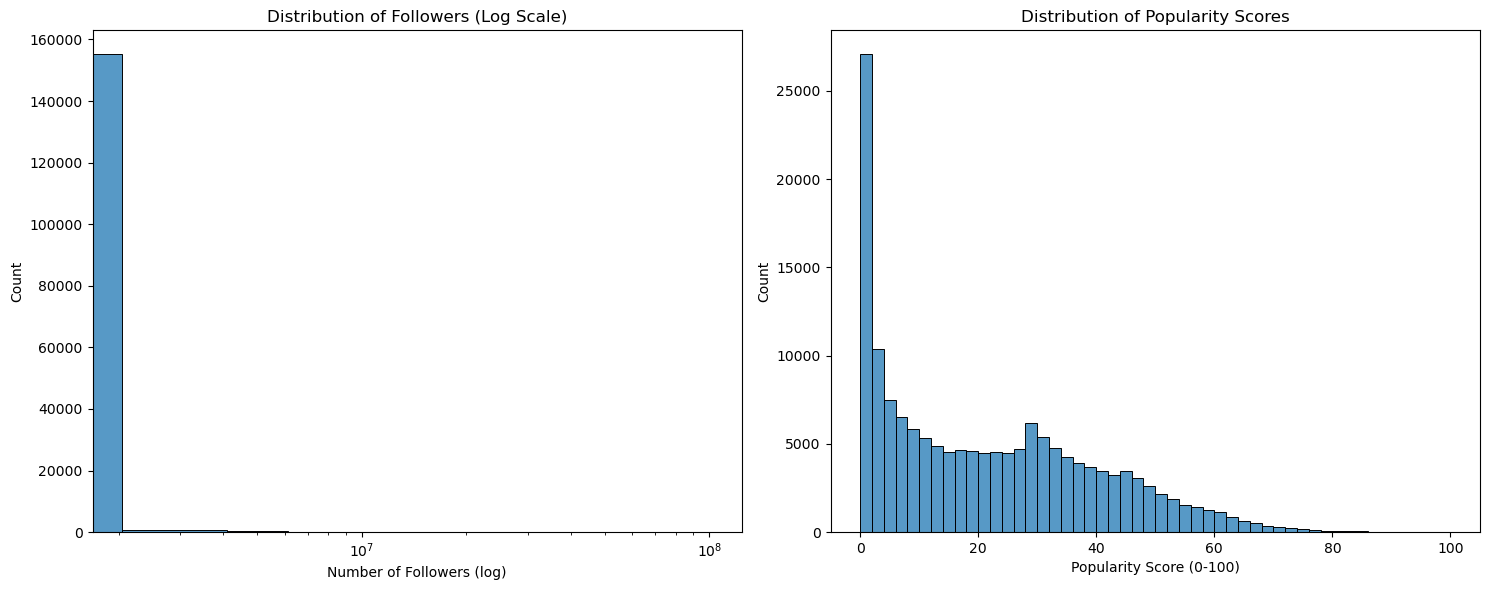

=== Distribution Characteristics ===

Followers:
Skewness: 42.47
% of artists with <1000 followers: 59.5%

Popularity:
Skewness: 0.63
% of artists with popularity <20: 52.0%


In [17]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot followers distribution (using log scale)
sns.histplot(data=nodes_df, x='followers', ax=ax1, bins=50)
ax1.set_xscale('log')
ax1.set_title('Distribution of Followers (Log Scale)')
ax1.set_xlabel('Number of Followers (log)')
ax1.set_ylabel('Count')

# Plot popularity distribution
sns.histplot(data=nodes_df, x='popularity', ax=ax2, bins=50)
ax2.set_title('Distribution of Popularity Scores')
ax2.set_xlabel('Popularity Score (0-100)')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Calculate some additional statistics
print("=== Distribution Characteristics ===")
print("\nFollowers:")
print(f"Skewness: {nodes_df['followers'].skew():.2f}")
print(f"% of artists with <1000 followers: {(nodes_df['followers'] < 1000).mean()*100:.1f}%")

print("\nPopularity:")
print(f"Skewness: {nodes_df['popularity'].skew():.2f}")
print(f"% of artists with popularity <20: {(nodes_df['popularity'] < 20).mean()*100:.1f}%")

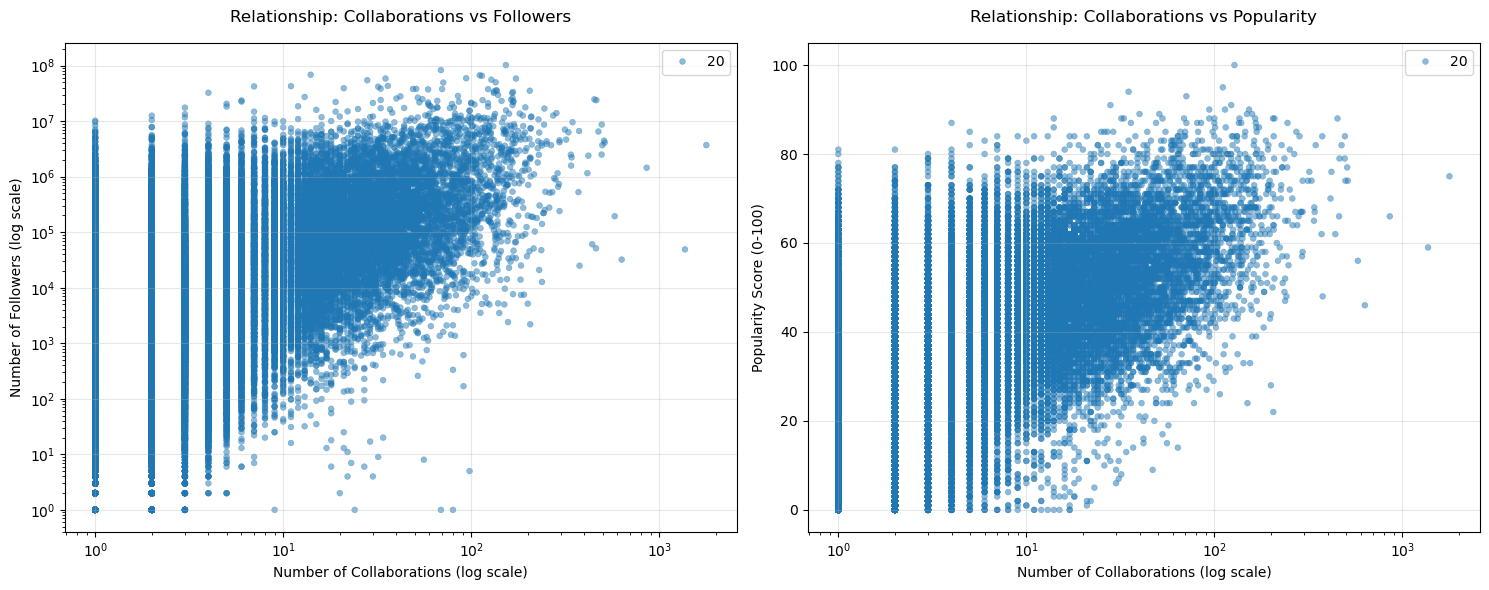

=== Correlation Analysis ===

Spearman Correlation Coefficients:
Collaborations vs Followers: 0.502
Collaborations vs Popularity: 0.538


In [18]:
# Set up the visualization parameters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Prepare the data
nodes_with_collabs = nodes_df.copy()
nodes_with_collabs['collaboration_count'] = nodes_with_collabs['spotify_id'].map(artist_collabs).fillna(0)

# Define common plot parameters
scatter_params = {
    'alpha': 0.5,
    'size': 20,
    'edgecolor': None
}

# Plot collaborations vs followers (log-log scale)
sns.scatterplot(
    data=nodes_with_collabs,
    x='collaboration_count',
    y='followers',
    ax=ax1,
    **scatter_params
)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('Relationship: Collaborations vs Followers', pad=15)
ax1.set_xlabel('Number of Collaborations (log scale)')
ax1.set_ylabel('Number of Followers (log scale)')
ax1.grid(True, alpha=0.3)

# Plot collaborations vs popularity
sns.scatterplot(
    data=nodes_with_collabs,
    x='collaboration_count',
    y='popularity',
    ax=ax2,
    **scatter_params
)
ax2.set_xscale('log')
ax2.set_title('Relationship: Collaborations vs Popularity', pad=15)
ax2.set_xlabel('Number of Collaborations (log scale)')
ax2.set_ylabel('Popularity Score (0-100)')
ax2.grid(True, alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Calculate and display correlation statistics
# Using spearman correlation as it is more suited for non linear relationships
print("=== Correlation Analysis ===")
print("\nSpearman Correlation Coefficients:")
correlations = {
    'Collaborations vs Followers': nodes_with_collabs['collaboration_count'].corr(
        nodes_with_collabs['followers'], 
        method='spearman'
    ),
    'Collaborations vs Popularity': nodes_with_collabs['collaboration_count'].corr(
        nodes_with_collabs['popularity'], 
        method='spearman'
    )
}

for relationship, coefficient in correlations.items():
    print(f"{relationship}: {coefficient:.3f}")

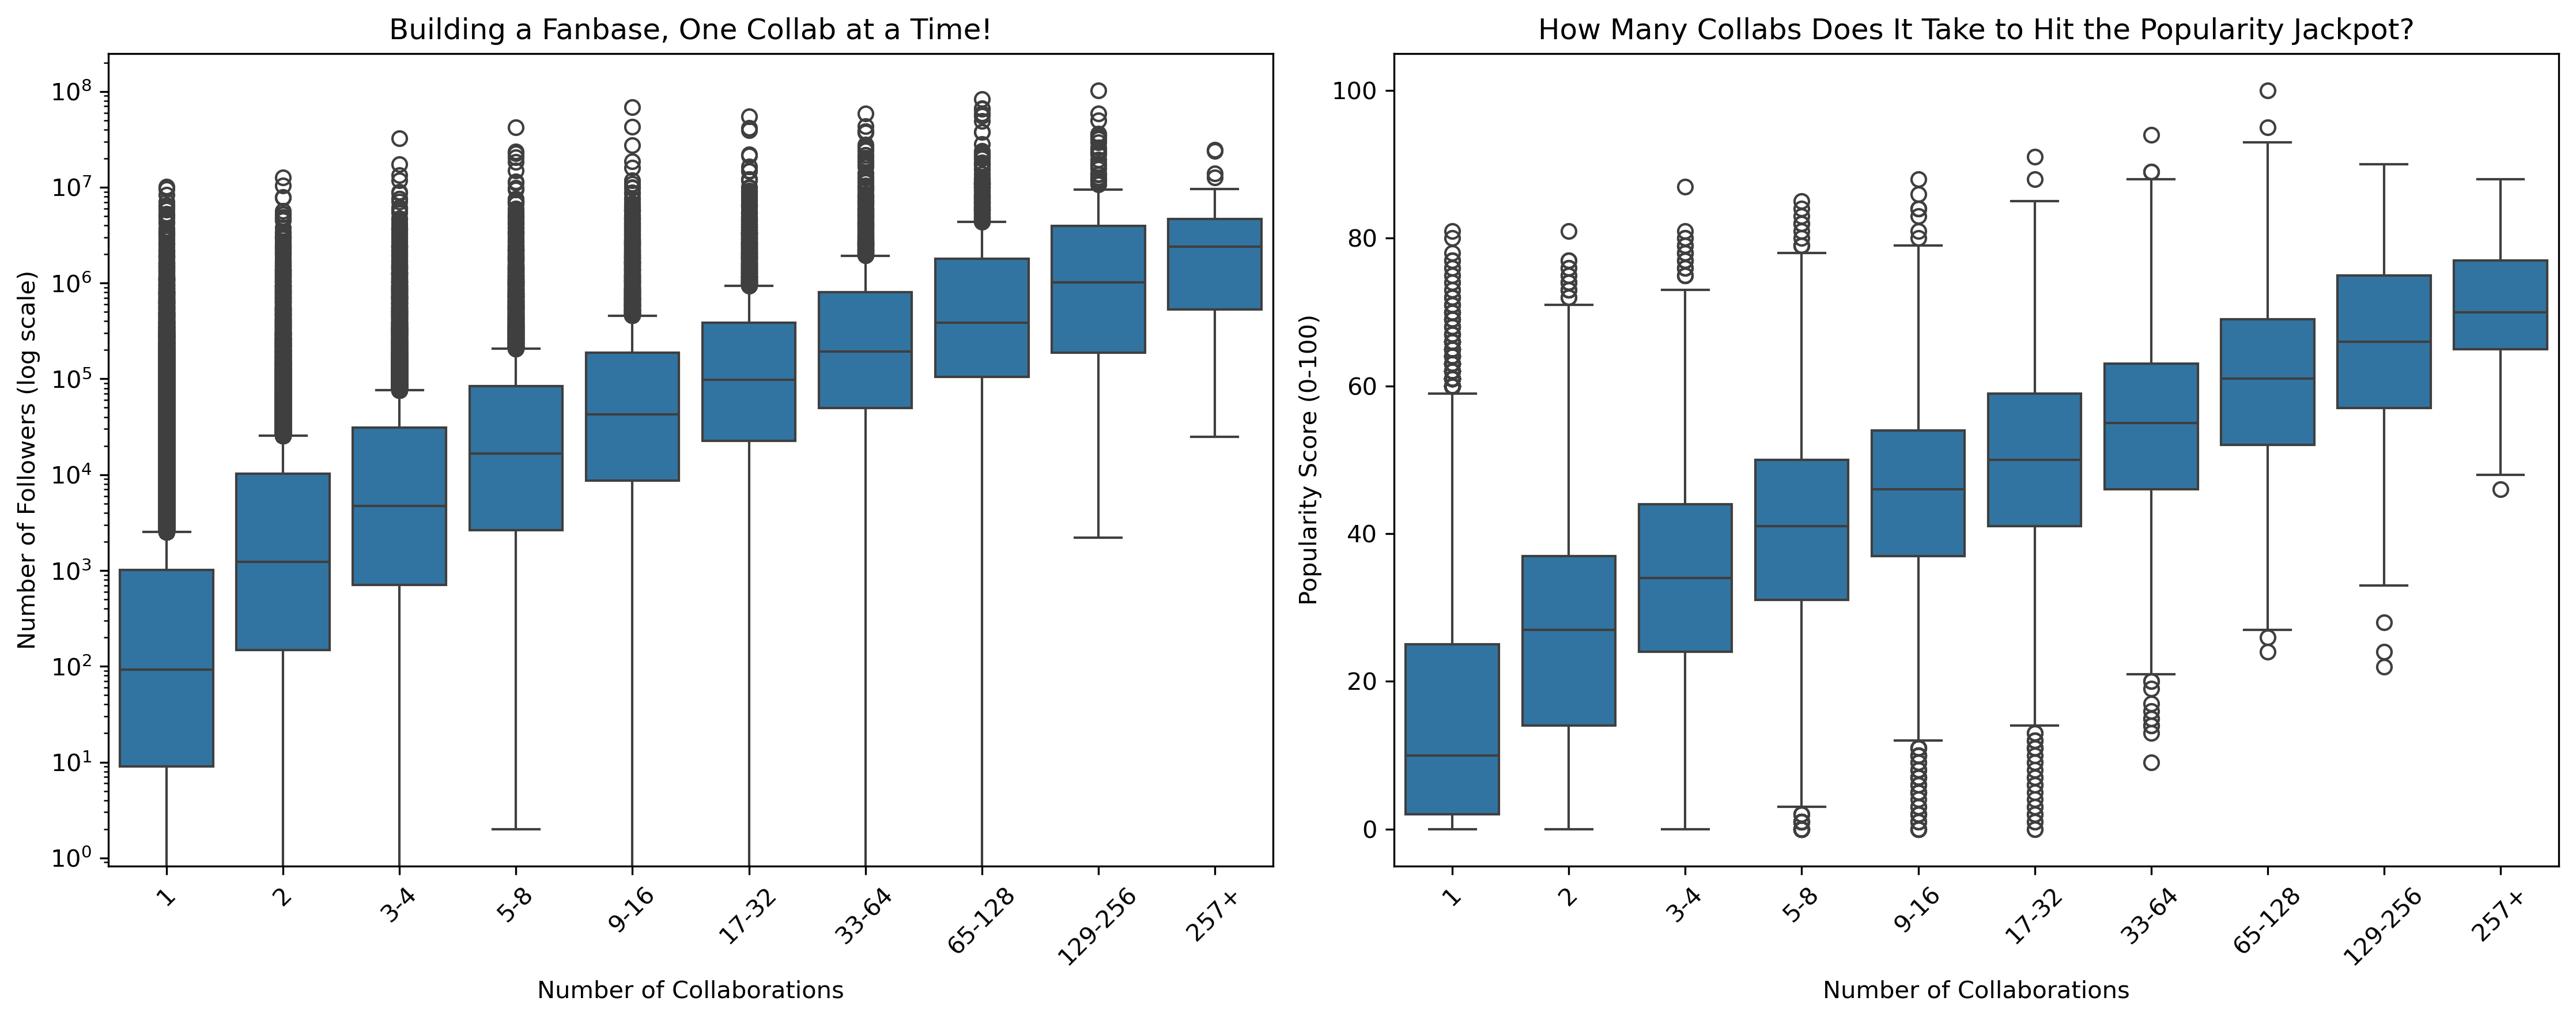

=== Summary Statistics ===

Median values for each collaboration range:

Followers:
collab_range
1               92.0
2             1237.5
3-4           4704.0
5-8          16658.0
9-16         42663.0
17-32        97840.0
33-64       192252.5
65-128      386082.5
129-256    1022344.0
257+       2389551.0
Name: followers, dtype: float64

Popularity:
collab_range
1          10.0
2          27.0
3-4        34.0
5-8        41.0
9-16       46.0
17-32      50.0
33-64      55.0
65-128     61.0
129-256    66.0
257+       70.0
Name: popularity, dtype: float64


/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_40543/3537176160.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(nodes_with_collabs.groupby('collab_range')['followers'].median())
/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_40543/3537176160.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(nodes_with_collabs.groupby('collab_range')['popularity'].median())


In [30]:
# Set up the visualization parameters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=300)

# Create collaboration bins (using log scale)
nodes_with_collabs = nodes_df.copy()
nodes_with_collabs['collaboration_count'] = nodes_with_collabs['spotify_id'].map(artist_collabs).fillna(0)

# Create collaboration range categories
nodes_with_collabs['collab_range'] = pd.cut(nodes_with_collabs['collaboration_count'], 
                                           bins=[0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 1800],
                                           labels=['1', '2', '3-4', '5-8', '9-16', '17-32', 
                                                 '33-64', '65-128', '129-256', '257+'])

# Plot followers boxplot (log scale)
sns.boxplot(data=nodes_with_collabs, 
           x='collab_range', 
           y='followers',
           ax=ax1)
ax1.set_yscale('log')
ax1.set_title('Building a Fanbase, One Collab at a Time!')
ax1.set_xlabel('Number of Collaborations')
ax1.set_ylabel('Number of Followers (log scale)')
ax1.tick_params(axis='x', rotation=45)

# Plot popularity boxplot
sns.boxplot(data=nodes_with_collabs, 
           x='collab_range', 
           y='popularity',
           ax=ax2)
ax2.set_title('How Many Collabs Does It Take to Hit the Popularity Jackpot?')
ax2.set_xlabel('Number of Collaborations')
ax2.set_ylabel('Popularity Score (0-100)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print some statistics for each range
print("=== Summary Statistics ===")
print("\nMedian values for each collaboration range:")
print("\nFollowers:")
print(nodes_with_collabs.groupby('collab_range')['followers'].median())
print("\nPopularity:")
print(nodes_with_collabs.groupby('collab_range')['popularity'].median())

In [27]:
# Calculate total hits from chart_hits columns and filter for high popularity but few collaborations
high_pop_low_collab = nodes_with_collabs.copy()
high_pop_low_collab['total_hits'] = high_pop_low_collab['chart_hits'].apply(
    lambda x: sum(int(hit.split('(')[1].strip(')')) for hit in eval(x)) if isinstance(x, str) else 0
)

# Filter and sort
high_pop_low_collab = high_pop_low_collab[
    (high_pop_low_collab['popularity'] > 70) & 
    (high_pop_low_collab['collaboration_count'] <= 2)
].sort_values(['popularity', 'total_hits'], ascending=[False, False])

# Display results
print("Artists with popularity > 70 but ≤ 2 collaborations:")
print("\nTotal count:", len(high_pop_low_collab))
high_pop_low_collab[['name', 'followers', 'popularity', 'collaboration_count', 'total_hits']].head(10)


Artists with popularity > 70 but ≤ 2 collaborations:

Total count: 68


,name,followers,popularity,collaboration_count,total_hits
16116,Harry Styles,23284667.0,91,0.0,1487
558,Arctic Monkeys,15862633.0,86,0.0,506
11527,Conan Gray,6498675.0,81,1.0,143
4370,Luis Miguel,10461701.0,81,2.0,120
16284,AC/DC,24321731.0,80,0.0,168
3066,ABBA,8715881.0,80,0.0,143
17603,Nirvana,15903777.0,80,0.0,111
14514,Cigarettes After Sex,4798187.0,80,0.0,36
15591,Zach Bryan,633879.0,80,1.0,8
18008,Guns N' Roses,25796418.0,79,0.0,92


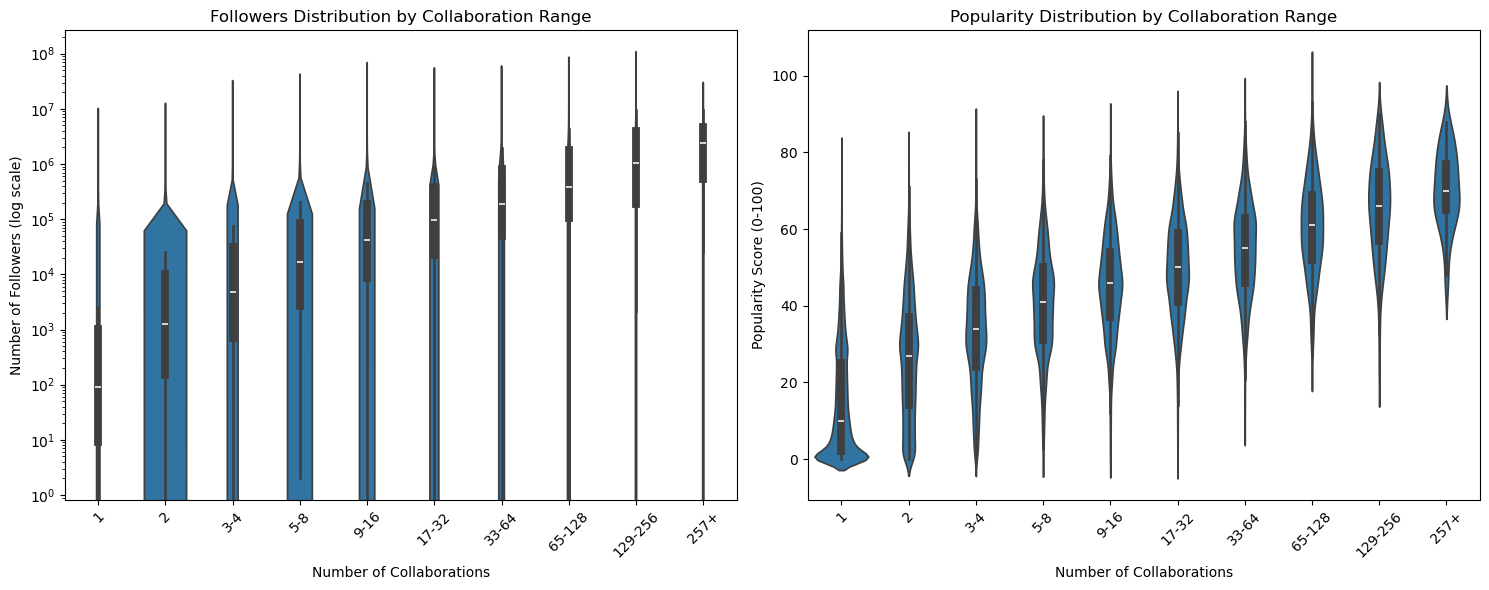

=== Summary Statistics ===

Median values for each collaboration range:

Followers:
collab_range
1               92.0
2             1237.5
3-4           4704.0
5-8          16658.0
9-16         42663.0
17-32        97840.0
33-64       192252.5
65-128      386082.5
129-256    1022344.0
257+       2389551.0
Name: followers, dtype: float64

Popularity:
collab_range
1          10.0
2          27.0
3-4        34.0
5-8        41.0
9-16       46.0
17-32      50.0
33-64      55.0
65-128     61.0
129-256    66.0
257+       70.0
Name: popularity, dtype: float64


/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_40543/3838546751.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(nodes_with_collabs.groupby('collab_range')['followers'].median())
/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_40543/3838546751.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(nodes_with_collabs.groupby('collab_range')['popularity'].median())


In [20]:
# Set up the visualization parameters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Create collaboration bins (using log scale)
nodes_with_collabs = nodes_df.copy()
nodes_with_collabs['collaboration_count'] = nodes_with_collabs['spotify_id'].map(artist_collabs).fillna(0)

# Create collaboration range categories
nodes_with_collabs['collab_range'] = pd.cut(nodes_with_collabs['collaboration_count'], 
                                           bins=[0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 1800],
                                           labels=['1', '2', '3-4', '5-8', '9-16', '17-32', 
                                                 '33-64', '65-128', '129-256', '257+'])

# Plot followers violin plot (log scale)
sns.violinplot(data=nodes_with_collabs, 
              x='collab_range', 
              y='followers',
              ax=ax1)
ax1.set_yscale('log')
ax1.set_title('Followers Distribution by Collaboration Range')
ax1.set_xlabel('Number of Collaborations')
ax1.set_ylabel('Number of Followers (log scale)')
ax1.tick_params(axis='x', rotation=45)

# Plot popularity violin plot
sns.violinplot(data=nodes_with_collabs, 
              x='collab_range', 
              y='popularity',
              ax=ax2)
ax2.set_title('Popularity Distribution by Collaboration Range')
ax2.set_xlabel('Number of Collaborations')
ax2.set_ylabel('Popularity Score (0-100)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print some statistics for each range
print("=== Summary Statistics ===")
print("\nMedian values for each collaboration range:")
print("\nFollowers:")
print(nodes_with_collabs.groupby('collab_range')['followers'].median())
print("\nPopularity:")
print(nodes_with_collabs.groupby('collab_range')['popularity'].median())